In [1030]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [1031]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1032]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [1033]:
df = pd.read_csv(r'//content/drive/MyDrive/RAKAMIN/Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv')

In [1034]:
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
606,606,7232,1973,S1,Janda,42429000.000,0,1,11-02-2014,99,...,5,0,0,0,0,0,0,3,11,0
2110,2110,9729,1955,S1,Janda,58275000.000,1,1,02-06-2013,48,...,7,0,0,0,0,0,0,3,11,0
2224,2224,4286,1970,S3,Lajang,57642000.000,0,1,09-01-2014,24,...,4,1,0,0,0,0,0,3,11,0
2197,2197,10722,1973,S1,Bertunangan,55593000.000,0,1,21-08-2013,63,...,6,1,0,0,0,0,0,3,11,0
1671,1671,1964,1951,S1,Bertunangan,86610000.000,0,0,05-09-2013,66,...,2,0,0,0,0,0,0,3,11,0


In [1035]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [1036]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000,2240.000,2240.000,2216.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,...,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000
mean,1119.500,5592.160,1968.806,52247251.354,0.444,0.506,49.109,303935.714,26302.232,166950.000,...,5.317,0.073,0.075,0.073,0.064,0.013,0.009,3.000,11.000,0.149
std,646.777,3246.662,11.984,25173076.661,0.538,0.545,28.962,336597.393,39773.434,225715.373,...,2.427,0.260,0.263,0.260,0.245,0.115,0.096,0.000,0.000,0.356
min,0.000,0.000,1893.000,1730000.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
25%,559.750,2828.250,1959.000,35303000.000,0.000,0.000,24.000,23750.000,1000.000,16000.000,...,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
50%,1119.500,5458.500,1970.000,51381500.000,0.000,0.000,49.000,173500.000,8000.000,67000.000,...,6.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
75%,1679.250,8427.750,1977.000,68522000.000,1.000,1.000,74.000,504250.000,33000.000,232000.000,...,7.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
max,2239.000,11191.000,1996.000,666666000.000,2.000,2.000,99.000,1493000.000,199000.000,1725000.000,...,20.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,11.000,1.000


In [1037]:
#change Dt_Customer dtype from object to datetime 64[ns]
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Future Extraction

### Create Total Accapted campaign

In [1038]:
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

### Create Total Purchases Feature

In [1039]:
df['NumPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumCatalogPurchases']

### Create Product Spend

In [1040]:
df['SpendProduct'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Crete Age feature

In [1041]:
df['Age'] = 2023 - df['Year_Birth']

### Create Age Group (classfation)

In [1042]:
Age_group=[]
for i in df['Age']:
    if i >= 1 and i <= 5:
        group = 'toodler'
    elif i >= 6 and i <= 13 :
        group = 'kids'
    elif i >= 14 and i <= 19 :
        group = 'teenager'
    elif i >= 20 and i <= 39 :
        group = 'adult'
    elif i >= 40 and i <= 59 :
        group = 'middle age'
    else:
        group = 'senior citizen'
    Age_group.append(group)
df['Age_Group'] = Age_group

In [1043]:
print('Grouping Age')
df['Age_Group'].value_counts()

Grouping Age


middle age        1237
senior citizen     744
adult              259
Name: Age_Group, dtype: int64

### Create Conversion Rate

In [1044]:
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
df['convention_rate'] = df.apply(lambda x: safe_div(x['NumPurchases'],x['NumWebVisitsMonth']), axis=1)

### Create Children Fiture

In [1045]:
df['NumChildren'] = df['Kidhome']+df['Teenhome']

### Memperbaiki data dimana Janda, duda, bertunagan, dan cerai menjadi Lajang

In [1046]:
df = df.replace(['Janda','Duda','Bertunangan', 'Cerai'], ['Lajang', 'Lajang', 'Lajang','Lajang'])
df.Marital_Status.value_counts()

Lajang     1376
Menikah     864
Name: Marital_Status, dtype: int64

Dt_Days_Customer

In [1047]:
from datetime import date

df['Dt_Collected'] = date.today()
df['Dt_Collected'] = df['Dt_Collected'].astype('datetime64[ns]')
df['Dt_Days_Customer'] = df['Dt_Collected'] - df['Dt_Customer']
df['Dt_Days_Customer'] = df['Dt_Days_Customer'].dt.days


In [1048]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

### Drop Data for analysys EDA

In [1049]:
df.drop(['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue','Dt_Customer'], inplace=True, axis=1)

In [1050]:
df.sample(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,Response,AcceptedCmp,NumPurchases,SpendProduct,Age,Age_Group,convention_rate,NumChildren,Dt_Collected,Dt_Days_Customer
1526,S3,Lajang,82032000.000,0,0,54,332000,194000,377000,149000,...,0,0,17,1234000,75,senior citizen,17.000,0,2023-03-18,3269
566,S1,Lajang,66565000.000,0,1,80,747000,10000,161000,65000,...,0,0,19,1065000,61,senior citizen,2.375,1,2023-03-18,3755
61,S1,Lajang,66653000.000,1,1,18,452000,18000,102000,16000,...,0,0,22,612000,48,middle age,7.333,2,2023-03-18,3844
500,S1,Lajang,27203000.000,1,1,92,13000,2000,21000,4000,...,0,0,6,64000,73,senior citizen,0.750,2,2023-03-18,3876
351,S1,Menikah,71952000.000,1,0,93,656000,80000,455000,52000,...,0,2,22,1443000,37,adult,5.500,1,2023-03-18,3719


# EDA

In [1051]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Income               2216 non-null   float64       
 3   Kidhome              2240 non-null   int64         
 4   Teenhome             2240 non-null   int64         
 5   Recency              2240 non-null   int64         
 6   MntCoke              2240 non-null   int64         
 7   MntFruits            2240 non-null   int64         
 8   MntMeatProducts      2240 non-null   int64         
 9   MntFishProducts      2240 non-null   int64         
 10  MntSweetProducts     2240 non-null   int64         
 11  MntGoldProds         2240 non-null   int64         
 12  NumDealsPurchases    2240 non-null   int64         
 13  NumWebPurchases      2240 non-nul

In [1052]:
categorical = ['Education', 'Marital_Status', 'Response', 'Complain', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp2','AcceptedCmp1', 'Age_Group']
number = ['Income', 'Recency','MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds','SpendProduct', 'NumPurchases', 'NumChildren', 'convention_rate','Age']

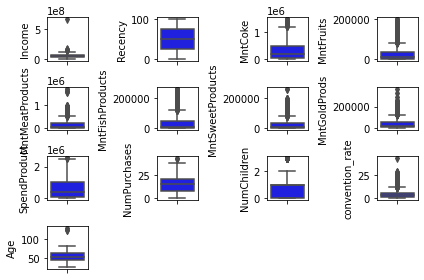

In [1053]:
features = number
for i in range(0, len(features)):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

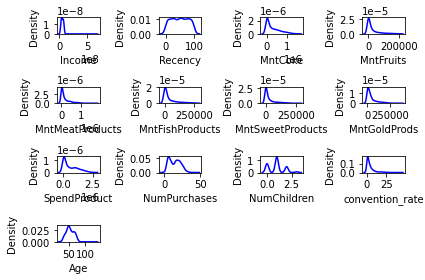

In [1054]:
features = number
for i in range(0, len(features)):
    plt.subplot(4,4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

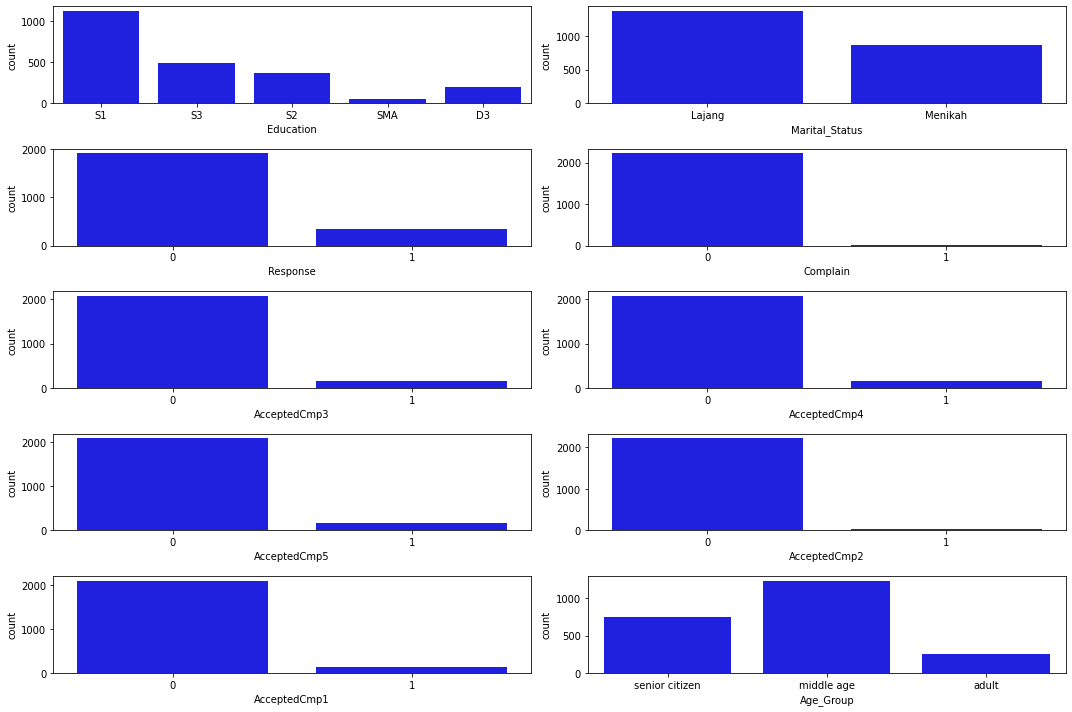

In [1055]:
features = categorical
plt.figure(figsize = (15,10))
for i in range(0, len(features)):
    plt.subplot(5,2, i+1)
    sns.countplot(x=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

<Axes: >

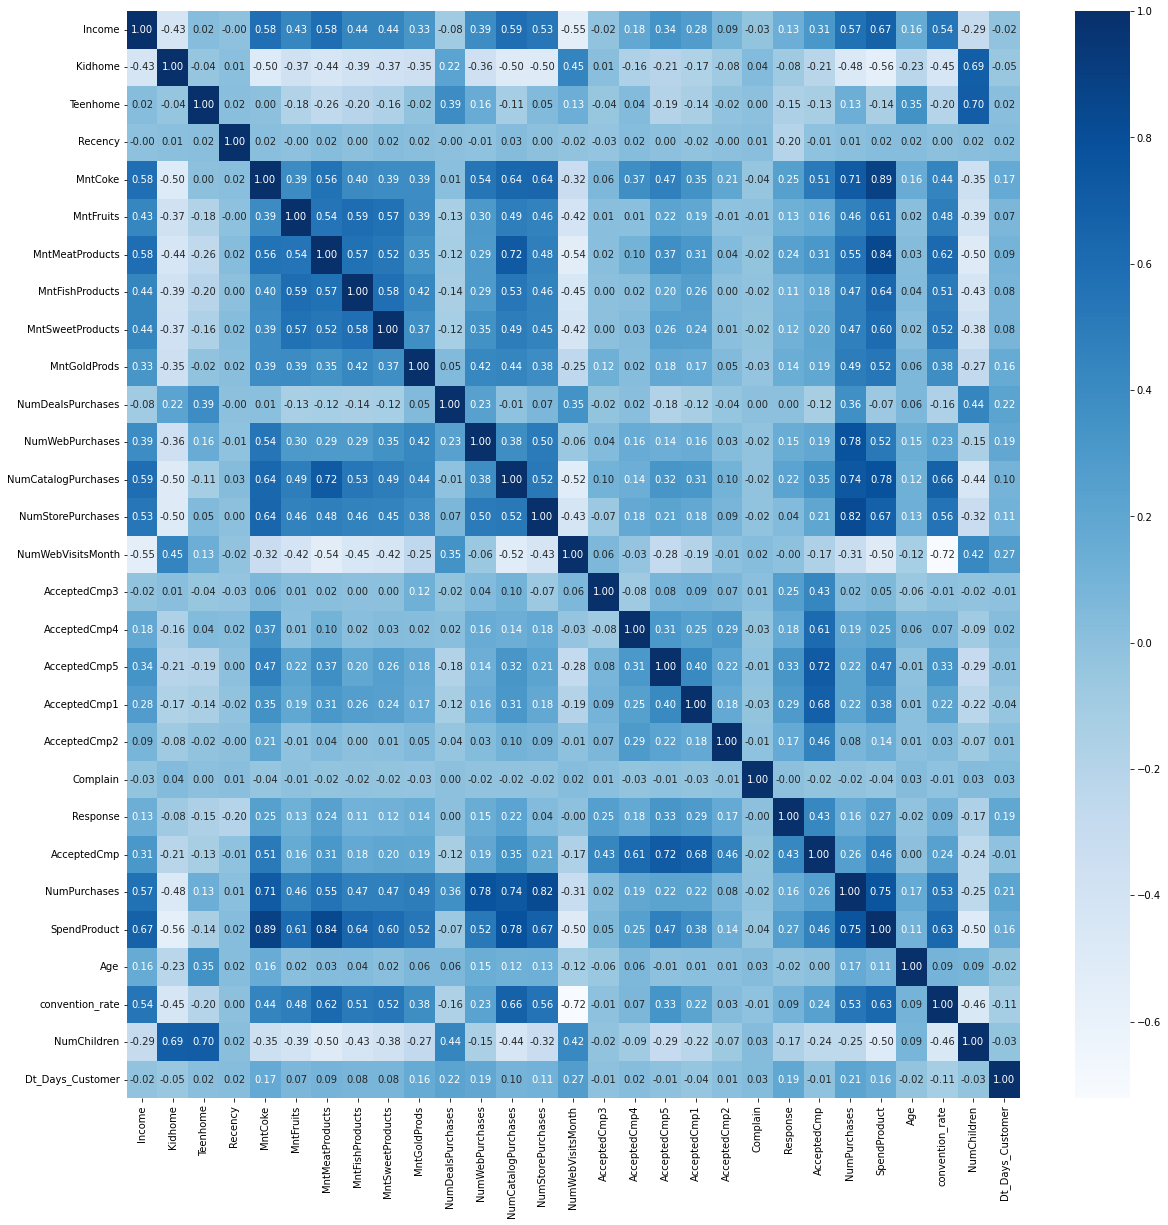

In [1056]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f',annot_kws={'size': 10})

# Insight

In [1057]:
df_insight1 = df.groupby('Age_Group').agg({'convention_rate':'sum'}).reset_index()
df_insight1

,Age_Group,convention_rate
0,adult,1241.880
1,middle age,4686.276
2,senior citizen,3917.142


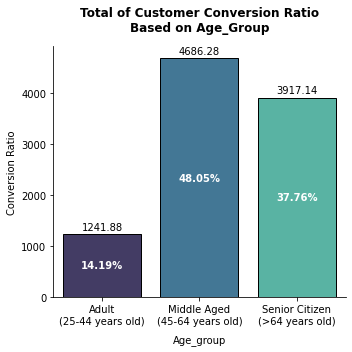

In [1058]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Total of Customer Conversion Ratio\nBased on Age_Group", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='Age_Group', y='convention_rate', data=df_insight1, edgecolor='black', palette='mako')

plt.ylabel('Conversion Ratio')
plt.xlabel('Age_group', labelpad=8)
plt.xticks(np.arange(3), ['Adult\n(25-44 years old)', 'Middle Aged\n(45-64 years old)', 'Senior Citizen\n(>64 years old)'])

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['14.19%', '48.05%', '37.76%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()
plt.savefig('customer_cvr.png')

Dari data di atas kita bisa ambil kesimpulan bahwa Middle Age Memiliki tingkar Convention_rate paling tinggi dan paling rendah dimiliki **adult**

In [1059]:
df_insight2 = df.groupby('Education').agg({'convention_rate':'sum'}).reset_index()
df_insight2

,Education,convention_rate
0,D3,756.439
1,S1,5202.146
2,S2,1686.339
3,S3,2142.395
4,SMA,57.977


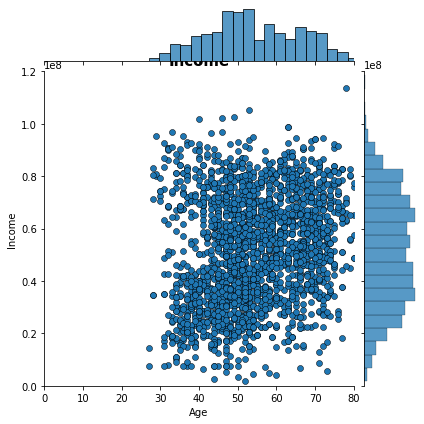

In [1060]:
plot = sns.jointplot(x=df['Age'], y=df['Income'], edgecolor='black')
plt.title('Age\nvs.\nIncome', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.savefig('age_income_jointplot.png')
plt.show()

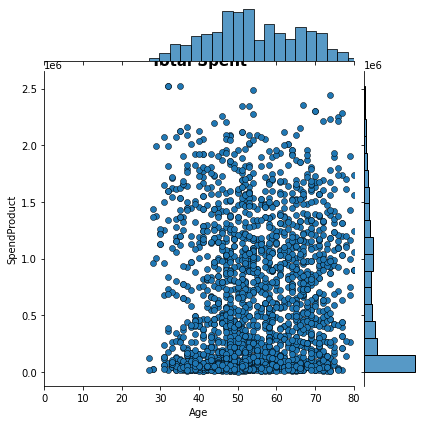

In [1061]:
plot = sns.jointplot(x=df['Age'], y=df['SpendProduct'], edgecolor='black')
plt.title('Age\nvs.\nTotal Spent', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plt.savefig('age_totspent_jointplot.png')
plt.show()

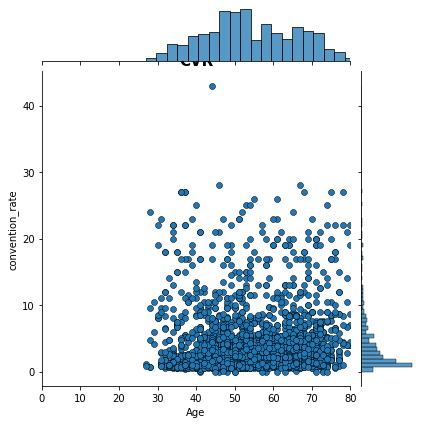

In [1062]:
plot = sns.jointplot(x=df['Age'], y=df['convention_rate'], edgecolor='black')
plt.title('Age\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plt.savefig('age_cvr_jointplot.png')
plt.show()

Text(0.5, 0, 'Education')

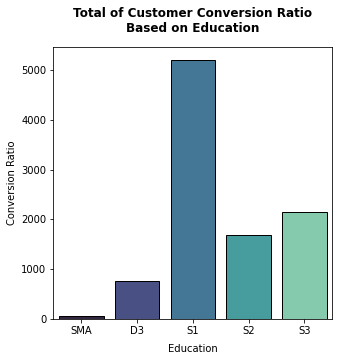

In [1063]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Total of Customer Conversion Ratio\nBased on Education", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='Education', y='convention_rate', data=df_insight2, edgecolor='black', palette='mako', order = ['SMA','D3','S1','S2','S3'])

plt.ylabel('Conversion Ratio')
plt.xlabel('Education', labelpad=8)

Dari data plot di atas dapat dilihat bahwa pada education S1 memiliki tingkat convention rate paling tinggi

In [1064]:
df_insight3 = df.groupby('Marital_Status').agg({'convention_rate':'sum'}).reset_index()
df_insight3

,Marital_Status,convention_rate
0,Lajang,6152.234
1,Menikah,3693.064


Text(0.5, 0, 'Marital_Status')

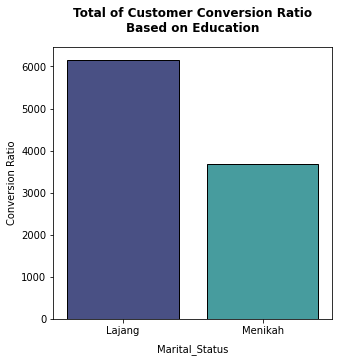

In [1065]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Total of Customer Conversion Ratio\nBased on Education", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='Marital_Status', y='convention_rate', data=df_insight3, edgecolor='black', palette='mako')

plt.ylabel('Conversion Ratio')
plt.xlabel('Marital_Status', labelpad=8)

Pada plot di atas dapat dilihat bahwa marital status Lajang memiliki convention rate lebih tinggi di banding dengan menikah

# Prepocessing

In [1066]:
df.sample(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,Response,AcceptedCmp,NumPurchases,SpendProduct,Age,Age_Group,convention_rate,NumChildren,Dt_Collected,Dt_Days_Customer
338,S1,Lajang,83003000.000,0,0,18,856000,61000,570000,40000,...,1,1,22,1674000,58,middle age,7.333,0,2023-03-18,3667
615,S1,Menikah,45837000.000,1,1,88,215000,13000,87000,17000,...,0,0,18,373000,49,middle age,2.571,2,2023-03-18,3522
1363,D3,Lajang,52203000.000,0,0,36,488000,21000,238000,56000,...,0,0,27,939000,73,senior citizen,4.500,0,2023-03-18,3882
1269,D3,Lajang,85485000.000,0,0,73,630000,26000,611000,44000,...,0,0,19,1383000,65,senior citizen,9.500,0,2023-03-18,3192
937,S3,Menikah,67536000.000,0,1,45,1253000,0,447000,23000,...,0,1,30,1829000,53,middle age,3.750,1,2023-03-18,3587


### Cleaning Data NULL


In [1067]:
df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
AcceptedCmp             0
NumPurchases            0
SpendProduct            0
Age                     0
Age_Group               0
convention_rate         0
NumChildren             0
Dt_Collected            0
Dt_Days_Customer        0
dtype: int64

In [1068]:
df_drop = df.dropna()

In [1069]:
df_drop.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
AcceptedCmp            0
NumPurchases           0
SpendProduct           0
Age                    0
Age_Group              0
convention_rate        0
NumChildren            0
Dt_Collected           0
Dt_Days_Customer       0
dtype: int64

# Cleaning Data Duplicate

In [1070]:
print(f'Jumlah data duplikat {(df_drop.duplicated().sum())}')
df_drop1 = df_drop.drop_duplicates()
print(f'Jumlah data duplikat {(df_drop1.duplicated().sum())}')
ww = round(((df_drop.duplicated().sum())/df_drop.Education.count())*100,2)
print(f'Persentase data duplicate yang di drop {ww}%')

Jumlah data duplikat 186
Jumlah data duplikat 0
Persentase data duplicate yang di drop 8.39%


In [1071]:
df_selection = df_drop1[['Education','Marital_Status','Age','Age_Group', 'Income','Recency','Dt_Days_Customer','Complain','Response','SpendProduct', 'Response','AcceptedCmp','NumWebVisitsMonth','NumPurchases','NumChildren','convention_rate','Complain']].reset_index()

In [1072]:
df_selection.drop(['index'], inplace=True, axis=1)

In [1073]:
df_selection.sample(5)

,Education,Marital_Status,Age,Age_Group,Income,Recency,Dt_Days_Customer,Complain,Response,SpendProduct,Response,AcceptedCmp,NumWebVisitsMonth,NumPurchases,NumChildren,convention_rate,Complain
78,S1,Menikah,63,senior citizen,29440000.000,95,3506,0,0,56000,0,0,7,7,2,1.000,0
678,S2,Lajang,58,middle age,55250000.000,49,3800,0,0,903000,0,0,5,26,1,5.200,0
344,S3,Lajang,54,middle age,62187000.000,38,3283,0,0,636000,0,0,4,21,1,5.250,0
918,S3,Menikah,48,middle age,40233000.000,84,3442,0,0,149000,0,0,6,13,1,2.167,0
1828,S3,Lajang,48,middle age,56559000.000,46,3735,0,0,484000,0,0,4,18,1,4.500,0


<Axes: >

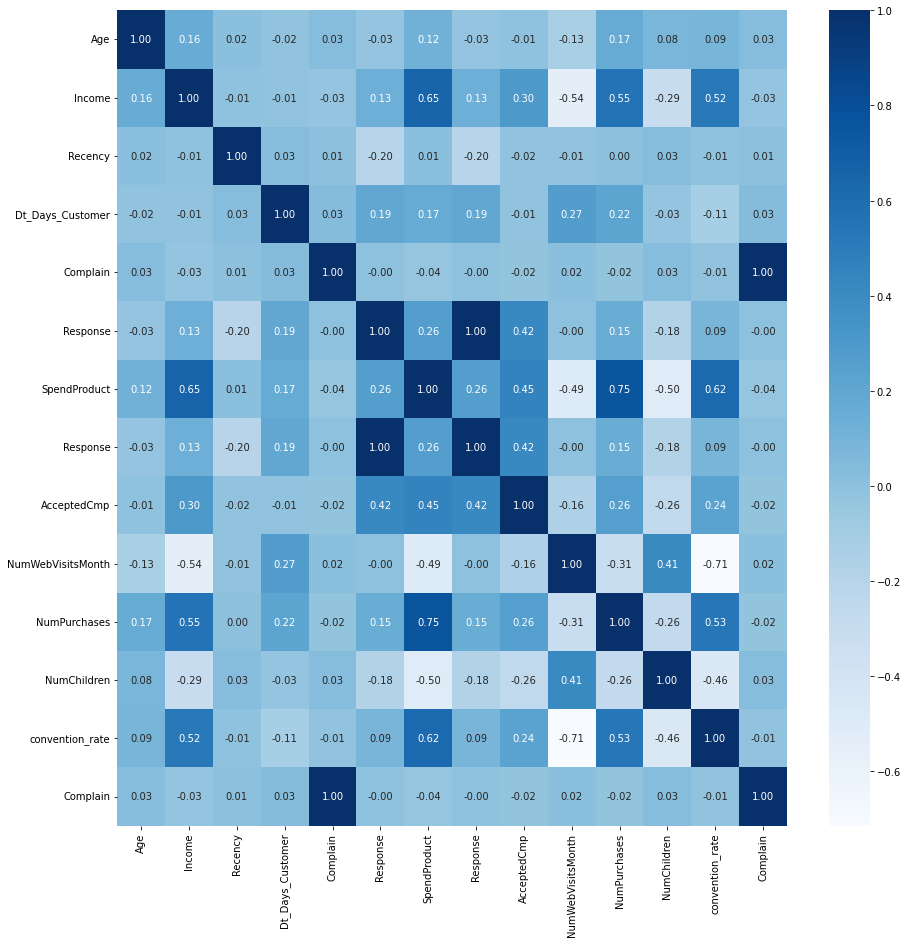

In [1074]:
plt.figure(figsize = (15,15))
sns.heatmap(df_selection.corr(), cmap='Blues', annot=True, fmt='.2f',annot_kws={'size': 10})

R = Recency

F = NumPurchases

M = SpendProduct

In [1075]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2030 non-null   object 
 1   Marital_Status     2030 non-null   object 
 2   Age                2030 non-null   int64  
 3   Age_Group          2030 non-null   object 
 4   Income             2030 non-null   float64
 5   Recency            2030 non-null   int64  
 6   Dt_Days_Customer   2030 non-null   int64  
 7   Complain           2030 non-null   int64  
 8   Response           2030 non-null   int64  
 9   SpendProduct       2030 non-null   int64  
 10  Response           2030 non-null   int64  
 11  AcceptedCmp        2030 non-null   int64  
 12  NumWebVisitsMonth  2030 non-null   int64  
 13  NumPurchases       2030 non-null   int64  
 14  NumChildren        2030 non-null   int64  
 15  convention_rate    2030 non-null   float64
 16  Complain           2030 

In [1076]:
df_clean.sample(5)

,Education,Marital_Status,Age,Age_Group,Income,Recency,Dt_Days_Customer,Complain,Response,SpendProduct,Response,AcceptedCmp,NumWebVisitsMonth,NumPurchases,NumChildren,convention_rate,Complain,clusters
105,S1,Lajang,61,senior citizen,50785000.000,27,3447,0,0,114000,0,0,6,8,2,1.333,0,1
1539,S1,Lajang,57,middle age,43602000.000,45,3090,0,0,68000,0,0,6,9,2,1.500,0,1
122,S3,Menikah,59,middle age,41551000.000,51,3503,0,0,279000,0,0,8,16,2,2.000,0,3
1018,S1,Lajang,57,middle age,70713000.000,23,4023,0,0,1477000,0,0,3,25,1,8.333,0,0
1658,S1,Menikah,67,senior citizen,90369000.000,2,3246,0,1,1588000,1,0,1,17,0,17.000,0,2


### Data Selection for Clusstering

In [1077]:
df_final = df_clean[['Recency','NumPurchases','SpendProduct','Dt_Days_Customer','Age']].reset_index()
df_final.drop(['index'], inplace=True, axis=1)

In [1078]:
df_final

,Recency,NumPurchases,SpendProduct,Dt_Days_Customer,Age
0,58,25,1617000,3995,66
1,38,6,27000,3149,69
2,26,21,776000,3496,58
3,26,8,53000,3089,39
4,94,19,422000,3345,42
...,...,...,...,...,...
2025,23,11,62000,3692,46
2026,46,18,1341000,3565,56
2027,91,19,1241000,3339,42
2028,8,23,843000,3340,67


In [1079]:
df_rd = df_final.copy()
df_rd = df_rd[['Recency','NumPurchases','SpendProduct','Dt_Days_Customer','Age']]
df_rd.columns = ['R', 'F', 'M','L','C']
df_rd1 = df_rd
df_rd.describe(include='all')

,R,F,M,L,C
count,2030.000,2030.000,2030.000,2030.000,2030.000
mean,48.892,14.893,607981.773,3535.606,54.205
std,28.982,7.660,603767.876,232.345,11.976
min,0.000,0.000,5000.000,3024.000,27.000
25%,24.000,8.000,69000.000,3362.250,46.000
50%,49.000,15.000,397000.000,3535.500,53.000
75%,74.000,21.000,1048000.000,3708.750,64.000
max,99.000,44.000,2525000.000,4087.000,130.000


<Axes: >

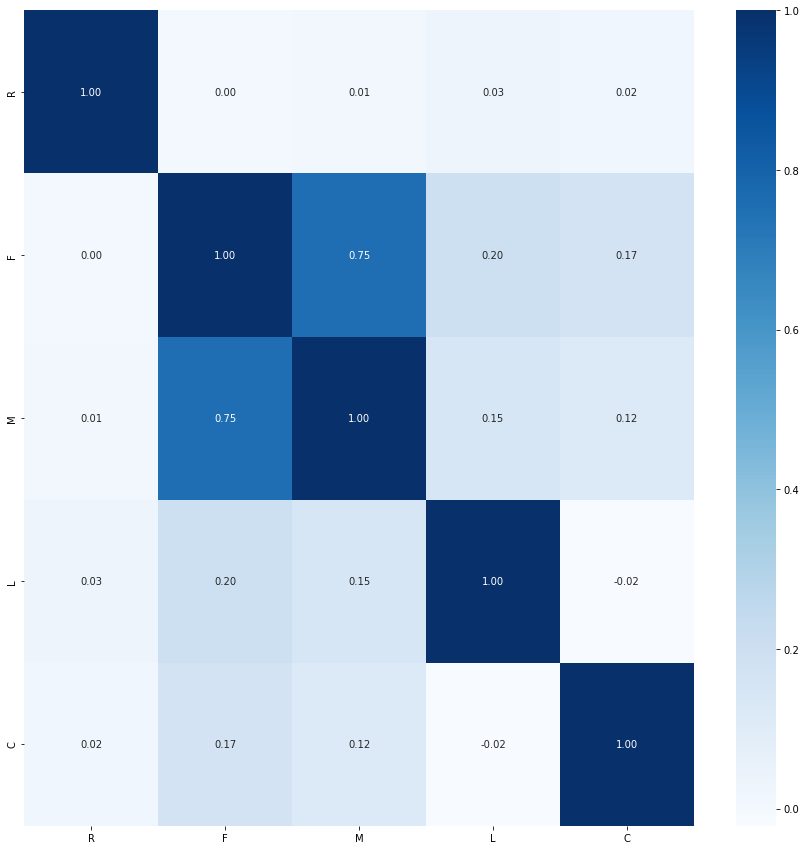

In [1080]:
plt.figure(figsize = (15,15))
sns.heatmap(df_rd.corr(), cmap='Blues', annot=True, fmt='.2f',annot_kws={'size': 10})

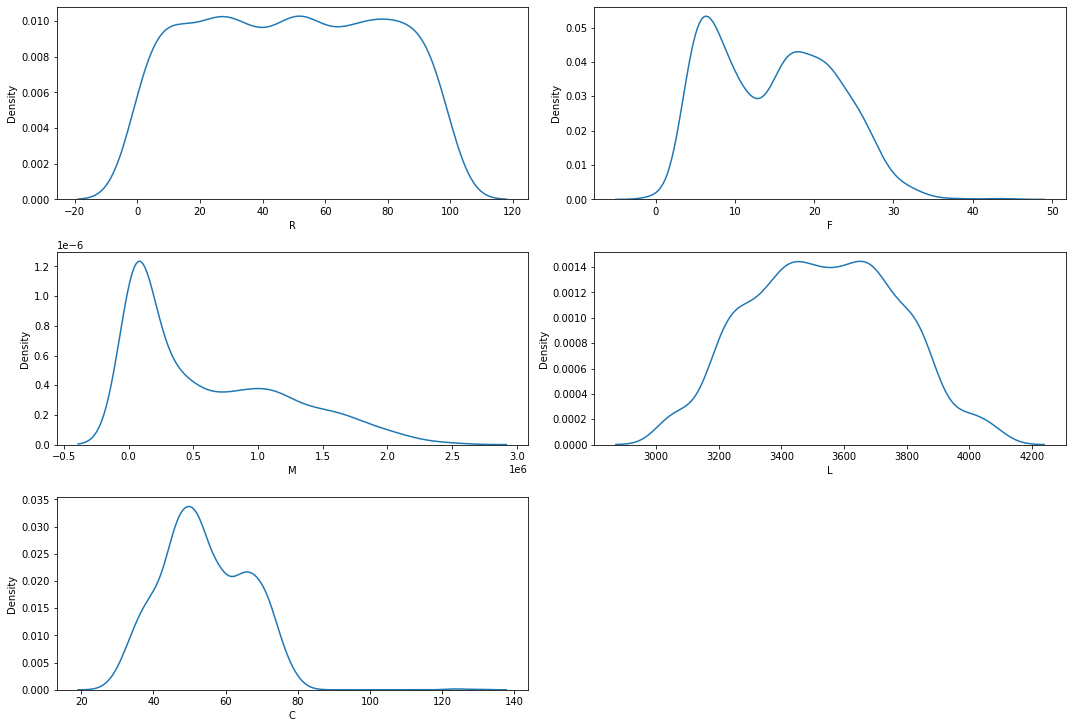

In [1081]:
cols = df_rd.columns

plt.figure(figsize= (15, 20))
for i in range(len(cols)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x = df_rd[cols[i]])
    plt.tight_layout()

Feature Transformation

In [1082]:
df_rd_log = df_rd
df_rd_log.describe()

,R,F,M,L,C
count,2030.000,2030.000,2030.000,2030.000,2030.000
mean,48.892,14.893,607981.773,3535.606,54.205
std,28.982,7.660,603767.876,232.345,11.976
min,0.000,0.000,5000.000,3024.000,27.000
25%,24.000,8.000,69000.000,3362.250,46.000
50%,49.000,15.000,397000.000,3535.500,53.000
75%,74.000,21.000,1048000.000,3708.750,64.000
max,99.000,44.000,2525000.000,4087.000,130.000


### Standarisasi

In [1083]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

col_name = list(df_rd_log.columns)

# replace inf values with NaN
df_rd_log.replace([np.inf, -np.inf], np.nan, inplace=True)

mm = StandardScaler()
df_std_mm = mm.fit_transform(df_rd_log.dropna())
df_std_mm = pd.DataFrame(df_std_mm, columns=col_name)
df_std_mm.describe()


,R,F,M,L,C
count,2030.000,2030.000,2030.000,2030.000,2030.000
mean,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.687,-1.945,-0.999,-2.202,-2.272
25%,-0.859,-0.900,-0.893,-0.746,-0.685
50%,0.004,0.014,-0.350,-0.000,-0.101
75%,0.867,0.797,0.729,0.745,0.818
max,1.729,3.801,3.176,2.374,6.330


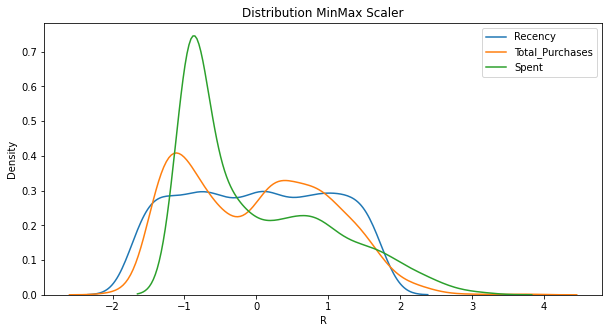

In [1084]:
plt.figure(figsize=(10, 5))
plt.title('Distribution MinMax Scaler')
sns.kdeplot(df_std_mm['R'], label = 'Recency')
sns.kdeplot(df_std_mm['F'], label = 'Total_Purchases')
sns.kdeplot(df_std_mm['M'], label = 'Spent')

plt.legend()
plt.show()

In [1085]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_std_mm.describe()

,R,F,M,L,C
count,2030.000,2030.000,2030.000,2030.000,2030.000
mean,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.687,-1.945,-0.999,-2.202,-2.272
25%,-0.859,-0.900,-0.893,-0.746,-0.685
50%,0.004,0.014,-0.350,-0.000,-0.101
75%,0.867,0.797,0.729,0.745,0.818
max,1.729,3.801,3.176,2.374,6.330


### Elbow Method

In [1086]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import cluster 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(df_std_mm,cluster=[2,3,4]):
    X = df_std_mm.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4153829920771552


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.3722997634883301


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.374817305938202


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.3665588083427082


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3521972540481418


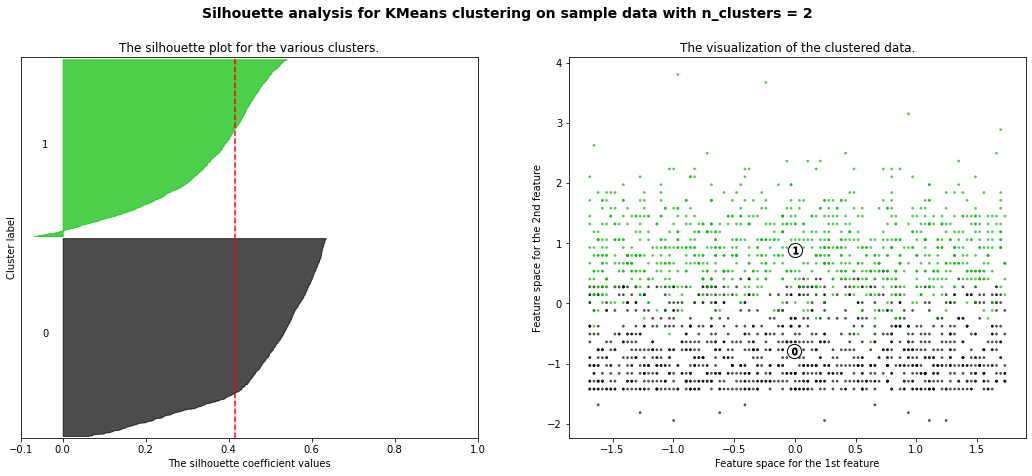

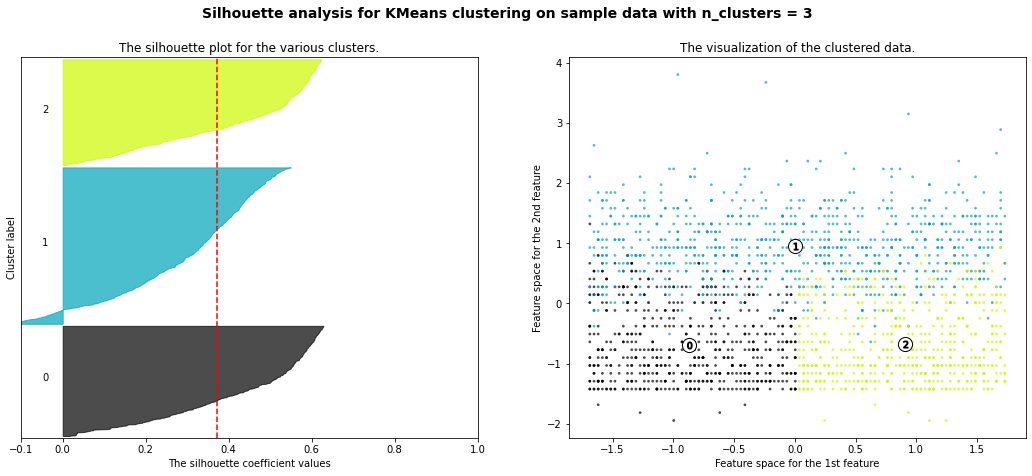

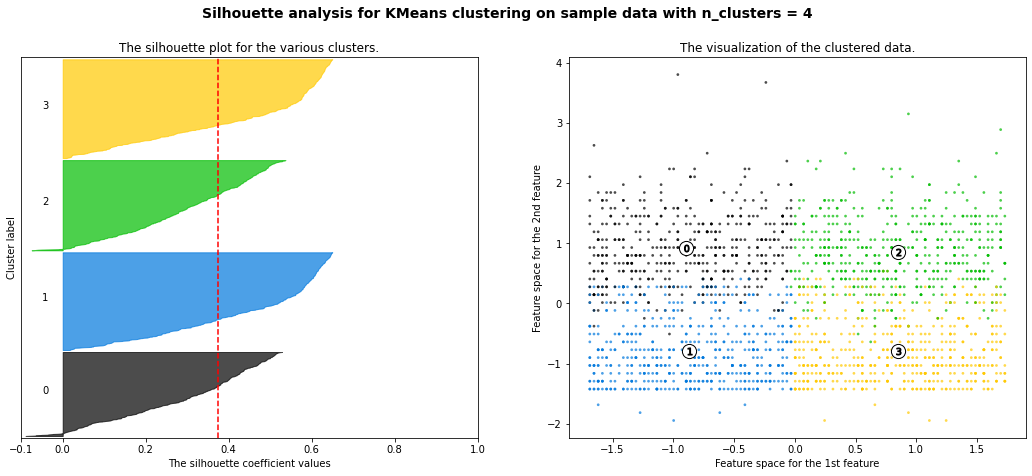

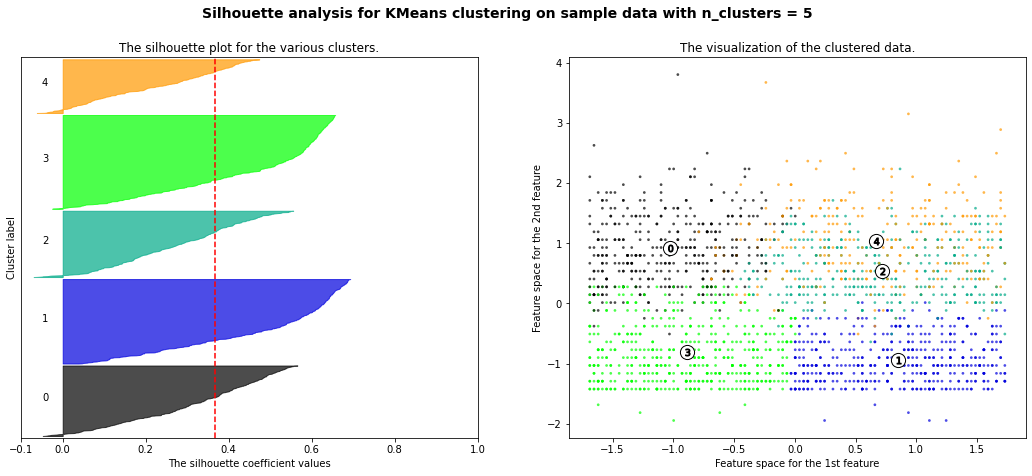

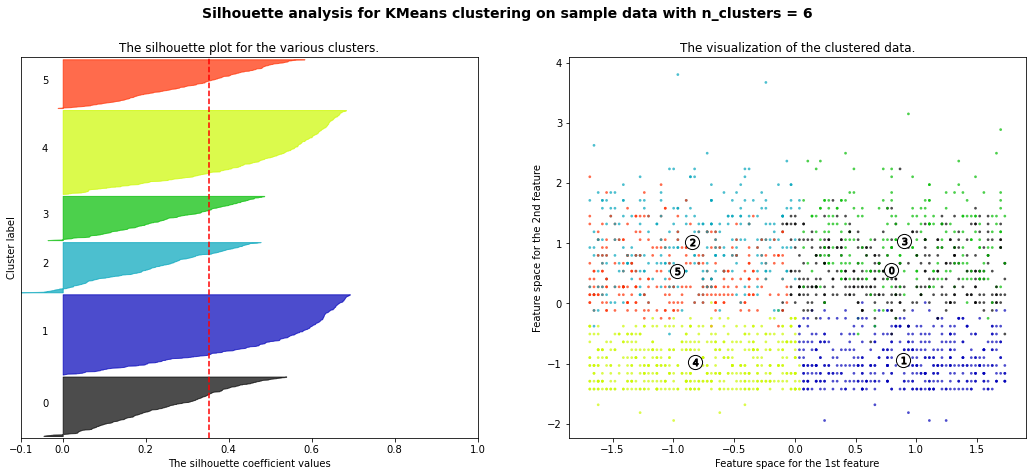

In [1087]:
silhoutte_analysis(df_std_mm[['R','F','M']],list(range(2,7)))

### Kmeans

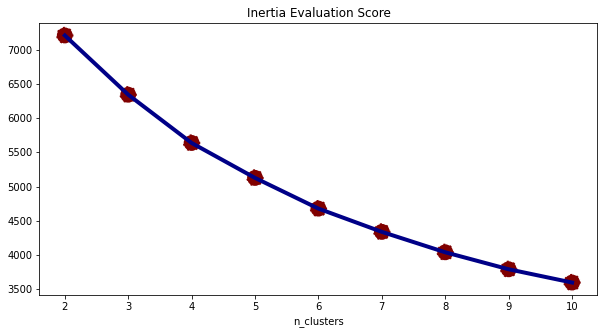

In [1088]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(df_std_mm)
    kmeans.fit(df_std_mm)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.title('Inertia Evaluation Score')
sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

### Silhouette Score

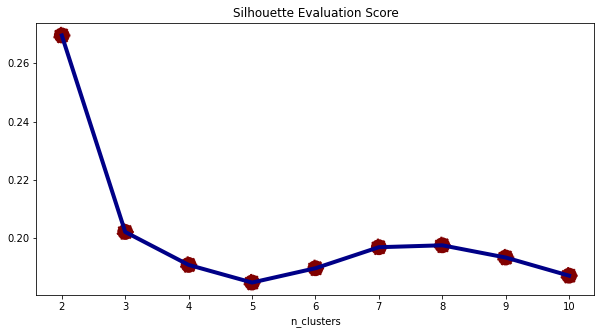

In [1089]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i,n_init=10).fit(df_std_mm)
    preds = kmeans.predict(df_std_mm)
    score_euclidean = silhouette_score(df_std_mm, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Silhouette Evaluation Score')
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()


In [1090]:
kmeans = KMeans(n_clusters=4,n_init=10, random_state=0).fit(df_rd)

# fit the k-means object to the data
kmeans.fit(df_std_mm)

#print the labels for each data point
print(kmeans.labels_)

# print the centroids of the clusters
df_cluster['clusters'] = kmeans.labels_

[2 1 2 ... 0 2 2]


In [1091]:
df_cluster.sample(10)

,R,F,M,L,C,clusters
424,72,4,20000,8,0.500,3
271,17,23,930000,3,7.667,2
711,37,9,38000,5,1.800,1
672,27,15,1621000,1,15.000,0
654,99,20,689000,4,5.000,3
698,74,16,284000,8,2.000,2
1777,56,22,1512000,2,11.000,0
91,43,7,55000,6,1.167,1
705,8,30,1099000,5,6.000,2
392,50,17,915000,4,4.250,0


PCA

In [1092]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_std_mm)
pcs = pca.transform(df_std_mm)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = df_cluster['clusters']
df_pca.sample(10)

,PC 1,PC 2,clusters
1536,1.059,0.015,2
693,0.814,0.305,0
882,0.154,-2.076,3
701,1.213,-0.738,0
203,-2.376,1.459,1
1927,1.622,1.517,2
573,-1.551,0.576,1
1931,-1.806,-0.600,3
1020,-1.235,0.907,3
966,0.937,1.364,2


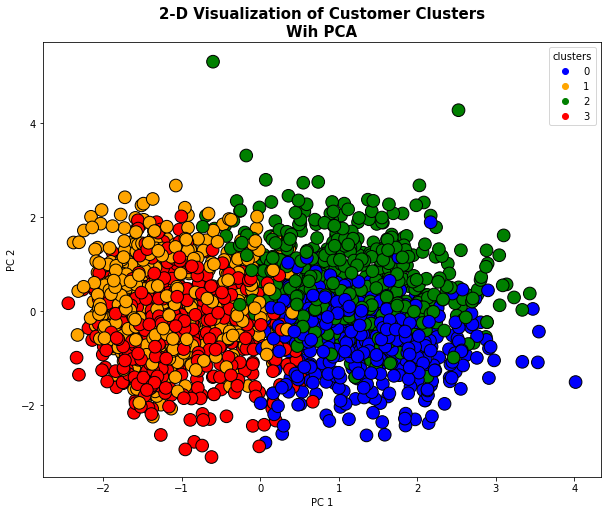

In [1093]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWih PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);

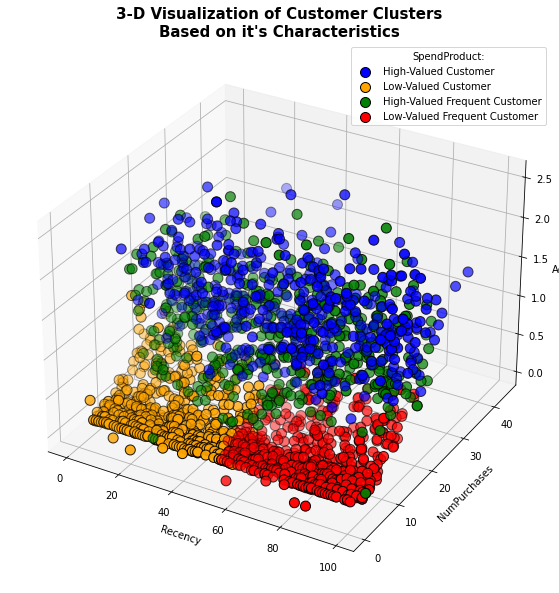

In [1094]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df_cluster['R'][df_cluster.clusters == 0], df_cluster['F'][df_cluster.clusters == 0], df_cluster['M'][df_cluster.clusters == 0], c='blue', s=100, edgecolor='black', label='High-Valued Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 1], df_cluster['F'][df_cluster.clusters == 1], df_cluster['M'][df_cluster.clusters == 1], c='orange', s=100, edgecolor='black', label='Low-Valued Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 2], df_cluster['F'][df_cluster.clusters == 2], df_cluster['M'][df_cluster.clusters == 2], c='green', s=100, edgecolor='black', label='High-Valued Frequent Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 3], df_cluster['F'][df_cluster.clusters == 3], df_cluster['M'][df_cluster.clusters == 3], c='red', s=100, edgecolor='black', label='Low-Valued Frequent Customer')
plt.xlabel('Recency')
plt.ylabel('NumPurchases')
ax.set_zlabel('Age')
plt.legend(title='SpendProduct:')
plt.show()

Insight

In [1095]:
df_tc = df_cluster.groupby('clusters').agg({'R':'count'}).reset_index()
df_tc = df_tc.rename(columns={'R':'total_customers'})
df_tc['sum_customers'] = df_tc['total_customers'].sum()
df_tc['pct'] = round((df_tc['total_customers']/df_tc['sum_customers'])*100, 2)
df_tc

,clusters,total_customers,sum_customers,pct
0,0,455,2030,22.410
1,1,546,2030,26.900
2,2,498,2030,24.530
3,3,531,2030,26.160


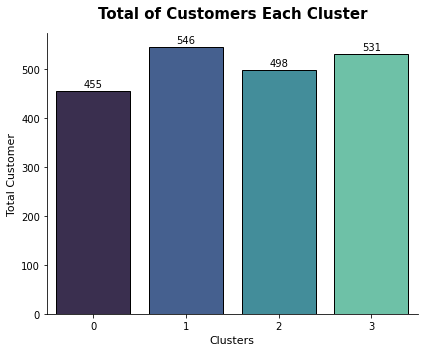

In [1096]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Total of Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='clusters', y='total_customers', data=df_tc, edgecolor='black', palette='mako')

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)

sns.despine()
plt.tight_layout()


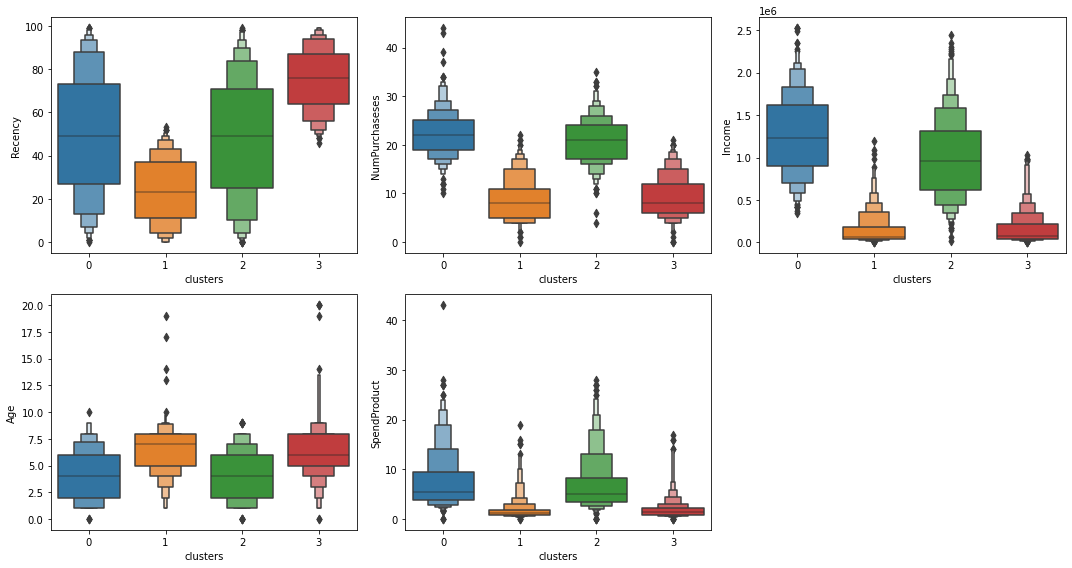

In [1097]:
df_clust = df_cluster.copy()
df_clust.rename(columns={'R':'Recency','F':'NumPurchaseses','M':'Income','L':'Age','C':'SpendProduct'}, inplace=True)
clust = df_clust.columns.drop('clusters')

plt.figure(figsize= (15, 8))
for i in range(len(clust)):
    plt.subplot(2, 3, i+1)
    sns.boxenplot(x=df_cluster['clusters'], y=df_clust[clust[i]])
    plt.tight_layout()

In [1098]:
df_clean['clusters'] = kmeans.labels_
df_clean.head(10)

,Education,Marital_Status,Age,Age_Group,Income,Recency,Dt_Days_Customer,Complain,Response,SpendProduct,Response,AcceptedCmp,NumWebVisitsMonth,NumPurchases,NumChildren,convention_rate,Complain,clusters
0,S1,Lajang,66,senior citizen,58138000.000,58,3995,0,1,1617000,1,0,7,25,0,3.571,0,2
1,S1,Lajang,69,senior citizen,46344000.000,38,3149,0,0,27000,0,0,5,6,2,1.200,0,1
2,S1,Lajang,58,middle age,71613000.000,26,3496,0,0,776000,0,0,4,21,0,5.250,0,2
3,S1,Lajang,39,adult,26646000.000,26,3089,0,0,53000,0,0,6,8,1,1.333,0,1
4,S3,Menikah,42,middle age,58293000.000,94,3345,0,0,422000,0,0,5,19,1,3.800,0,3
5,S2,Lajang,56,middle age,62513000.000,16,3477,0,0,716000,0,0,6,22,1,3.667,0,2
6,S1,Lajang,52,middle age,55635000.000,34,3777,0,0,590000,0,0,6,21,1,3.500,0,0
7,S3,Menikah,38,adult,33454000.000,32,3512,0,0,169000,0,0,8,10,1,1.250,0,1
8,S3,Lajang,49,middle age,30351000.000,19,3572,0,1,46000,1,0,9,6,1,0.667,0,1
9,S3,Lajang,73,senior citizen,5648000.000,68,3292,0,0,49000,0,1,20,2,2,0.100,0,3


In [1099]:
df_age_clust = df_clean.groupby(['clusters', 'Age_Group']).agg({'Education':'count'}).reset_index()
df_age_clust = df_age_clust.rename(columns={'Education':'total_customers'})
df_age_clust['sum_customers'] = df_age_clust['total_customers'].sum()
df_age_clust['pct'] = round((df_age_clust['total_customers']/df_age_clust['sum_customers'])*100, 2)
df_age_clust

,clusters,Age_Group,total_customers,sum_customers,pct
0,0,adult,88,2030,4.330
1,0,middle age,360,2030,17.730
2,0,senior citizen,7,2030,0.340
3,1,adult,84,2030,4.140
4,1,middle age,367,2030,18.080
5,1,senior citizen,95,2030,4.680
6,2,middle age,59,2030,2.910
7,2,senior citizen,439,2030,21.630
8,3,adult,62,2030,3.050
9,3,middle age,336,2030,16.550


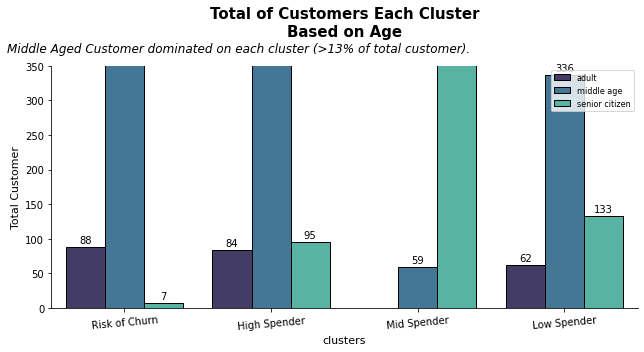

In [1100]:
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Total of Customers Each Cluster\nBased on Age", fontsize=15, color='black', weight='bold', pad=30)
sns.barplot(x='clusters', y='total_customers', data=df_age_clust, hue='Age_Group', edgecolor='black', palette='mako')
plt.text(x=-0.8, y=370, s="Middle Aged Customer dominated on each cluster (>13% of total customer).", fontsize=12, fontstyle='italic')
plt.xlabel('clusters', fontsize=11)
plt.xticks(np.arange(4), ['Risk of Churn', 'High Spender', 'Mid Spender', 'Low Spender'], rotation=5)
plt.ylabel('Total Customer', fontsize=11)
plt.ylim(0, 350)
plt.legend(prop={'size':8}, loc='best')
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
plt.bar_label(ax.containers[2], padding=2)
sns.despine()
plt.tight_layout()

In [1101]:
df_education_clust = df_clean.groupby(['clusters', 'Education']).agg({'Age_Group':'count'}).reset_index()
df_education_clust = df_education_clust.rename(columns={'Age_Group':'total_customers'})
df_education_clust['sum_customers'] = df_education_clust['total_customers'].sum()
df_education_clust['pct'] = round((df_education_clust['total_customers']/df_age_clust['sum_customers'])*100, 2)
df_education_clust

,clusters,Education,total_customers,sum_customers,pct
0,0,D3,39,2030,1.920
1,0,S1,248,2030,12.220
2,0,S2,66,2030,3.250
3,0,S3,101,2030,4.980
4,0,SMA,1,2030,0.050
5,1,D3,59,2030,2.910
6,1,S1,261,2030,12.860
7,1,S2,88,2030,4.330
8,1,S3,110,2030,5.420
9,1,SMA,28,2030,1.380


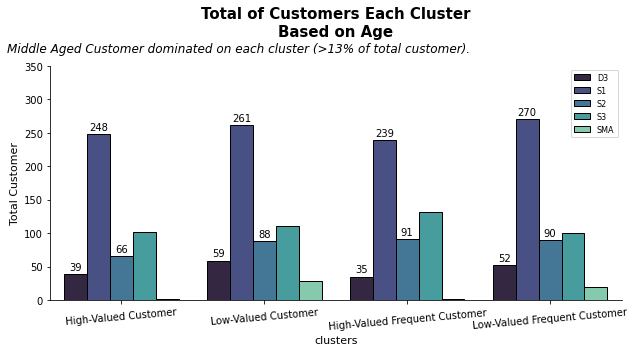

In [1102]:
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Total of Customers Each Cluster\nBased on Age", fontsize=15, color='black', weight='bold', pad=30)
sns.barplot(x='clusters', y='total_customers', data= df_education_clust, hue='Education', edgecolor='black', palette='mako')
plt.text(x=-0.8, y=370, s="Middle Aged Customer dominated on each cluster (>13% of total customer).", fontsize=12, fontstyle='italic')
plt.xlabel('clusters', fontsize=11)
plt.xticks(np.arange(4), ['High-Valued Customer', 'Low-Valued Customer', 'High-Valued Frequent Customer', 'Low-Valued Frequent Customer'], rotation=5)
plt.ylabel('Total Customer', fontsize=11)
plt.ylim(0, 350)
plt.legend(prop={'size':8}, loc='best')
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
plt.bar_label(ax.containers[2], padding=2)
sns.despine()
plt.tight_layout()

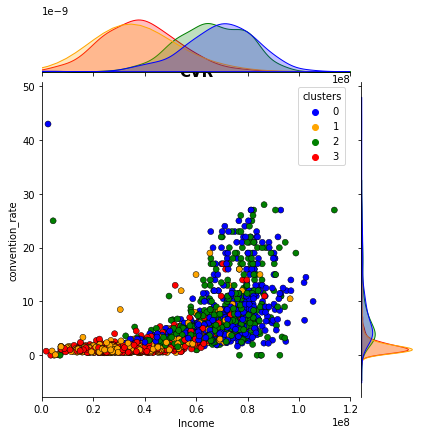

In [1103]:
plot = sns.jointplot(x=df_clean['Income'], y=df_clean['convention_rate'], hue=df_clean['clusters'], edgecolor='black', palette=['blue','orange','green','red'])
plt.title('Income\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 120000000)
plt.show()

In [1104]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2030 non-null   object 
 1   Marital_Status     2030 non-null   object 
 2   Age                2030 non-null   int64  
 3   Age_Group          2030 non-null   object 
 4   Income             2030 non-null   float64
 5   Recency            2030 non-null   int64  
 6   Dt_Days_Customer   2030 non-null   int64  
 7   Complain           2030 non-null   int64  
 8   Response           2030 non-null   int64  
 9   SpendProduct       2030 non-null   int64  
 10  Response           2030 non-null   int64  
 11  AcceptedCmp        2030 non-null   int64  
 12  NumWebVisitsMonth  2030 non-null   int64  
 13  NumPurchases       2030 non-null   int64  
 14  NumChildren        2030 non-null   int64  
 15  convention_rate    2030 non-null   float64
 16  Complain           2030 

In [1105]:
import numpy as np

df_mean = df_clean.groupby('clusters').agg({'Recency': 'mean',
                                            'Age': lambda x: np.percentile(x, 25),
                                            'convention_rate': 'mean',
                                            'Income': 'mean',
                                            'NumWebVisitsMonth': 'mean',
                                            'NumPurchases': 'mean',
                                            'SpendProduct': 'mean',
                                            'AcceptedCmp': 'mean'})

df_mean.rename(columns={'<lambda>': 'Age_25_percentile'}, inplace=True)
df_mean['Age_75_percentile'] = df_clean.groupby('clusters')['Age'].apply(lambda x: np.percentile(x, 75))

df_mean

,Recency,Age,convention_rate,Income,NumWebVisitsMonth,NumPurchases,SpendProduct,AcceptedCmp,Age_75_percentile
clusters,,,,,,,,,
0,49.690,41.000,7.614,70082105.495,4.275,22.303,1265861.538,0.633,52.000
1,23.648,43.000,1.838,38550472.527,6.209,8.861,146714.286,0.115,55.000
2,47.637,63.000,6.845,65679279.116,4.371,20.779,990596.386,0.420,71.000
3,75.341,45.000,1.897,38922026.365,6.202,9.226,159723.164,0.096,59.500


In [1106]:
print('High Spender: '+str(df_clean[df_clean['clusters']==0].SpendProduct.mean()))
print('Risk of Churn: '+str(df_clean[df_clean['clusters']==1].SpendProduct.mean()))
print('Mid Spender: '+str(df_clean[df_clean['clusters']==2].SpendProduct.mean()))
print('Low Spender: '+str(df_clean[df_clean['clusters']==3].SpendProduct.mean()))
print('Total Spent: '+str(670167000+45617000+604441000+36763000))

High Spender: 1265861.5384615385
Risk of Churn: 146714.2857142857
Mid Spender: 990596.3855421686
Low Spender: 159723.16384180792
Total Spent: 1356988000


Interpreation Customer Summary

1. Risk of Churn (Cluster 1):
- Total customer 546 (paling tinggi) 
- Recency 23
- Age 43 - 55
- cvr 1.83 (paling rendah)
- income 3.85K (paling rendah)
- Visit 6.20 (paling tinggi)
- Total Purchase 8.861 (paling rendah)
- Spend Product 146K )paling rendah)
- campaign accepted 0.115

Jumlah cutomer paling tinggi dengan recency, crv, income, dan total purchase paling rendah, namun uniknya total visit pada risk of churn paling tinggi, menandakan customer kemungkinan hanya datang untuk melihat barang saja tanpa membeli, atau hanya membandingkan harga dengan ecommers lain dan melihat promo yang ada pada ecommers kita. pada penggunaan campaign tenmasuk ke 2 dari yang terendah bisa menyababkan bahwa pada cluster risk of churn ini bergantung pada pemberian promo dan harga barang di marketplace atau ecommers kita.Perlu adanya pengecekan pada data lain yang bersangkutan mengenai bounce rate atau page value, karena ada kemungkinan customer merasa kurangn nyaman pada metode pembayaran, atau pada pemilihan jasa pengiriman kurang lengkap dan harga kirim terlalu mahal.


2. Low Spender (Cluster 3) 
- Total customer 531 (paling tinggi ke 2 ) 
- Recency 75.341 (paling tinggi)
- Age 45 - 59
- cvr 1.897 
- income 3.89M 
- Visit 6.202 
- Total Purchase 9.226 
- Spend Product 159K
- campaign accepted 0.096

Pada Low spender memiliki tinggkat recency yang cukup tinggi tapi pada total visit termasuk tinggi dan tinkat campaign accepted yang rendah. hal ini dapa menggambarkan bahwa customer low spender merupakan customer yang hanya melihat barang saja dan membeli ketika promo yang diberikan cocok. Hal tersenbut juga bisa menggambarkan bawa customer kemungkinan kesulitan untuk mendapatkan barang yang cocok, yang menandakan ada kekurang pada Search Engine.


3. Mid Spender (Cluster 2) 
- Total customer 498  
- Recency 47.637 
- Age 63 - 71
- cvr 6.845
- income 6.5M 
- Visit 4.371
- Total Purchase 20.779(paling tinggi) 
- Spend Product 990K
- campaign accepted 0.42

pada customer Mid spender dapat dilihat bahwa tingkat puchased item memili nilai paling tinggi, dan total visit yang cukup rendah, selain itu total campagn yang di ambil termasuk normal  atau berada di tengah -tengah. menandakan bahwa customer pada Mid spender merupakan customer yang tepat beli. Dimana customer hanya membeli barang sesuai dengan yang di inginkan, dan lenbih suka membeli barang yang tidak terlalu mahal.


4. High Spender (Cluster 0) 
- Total customer 455 (paling rendah) 
- Recency 49.690 
- Age 41-52
- cvr 7.614
- income 7M 
- Visit 4.275 (paling rendah)
- Total Purchase 20.303 
- Spend Product 1.2M
- campaign accepted 0.633

pada customer high spender memiliki total customer yang paling rendah, dan tingkat visit yang palinf rendah juga, selain itu untuk total accept campagn merupakan yang paling tinggi. Hal tersebut menggambarka bahwa customer high spender merupakan customer yang tepat beli tetapi lebih suka menggunakan promo yang ada pada ecommers.

Buisness Reccomendation
1. Memperbaiki search engine dan product recommendation
2. Melakukan pengecekan pada pageview, ada kemungkinan customer mengalami kendala pada metode pembayaran dan jasa kirim yang kurang lengkap
3. Memaksimalkan Mid spender dengan memberikan promo dalam bentuk notifikasi email, atau pun notifikasi aplikasi
4. Untuk Risk of churn membuat notifikasi remainder untuk product yang ada pada keranjang atau barang yang di cari sebelumnya
5. Low spender bisa memberikan notifikasi promo atau pengingat pada email dimana pada low spender memiliki tingkat recency yang cukup tinggi, kemungkinan customer sudah menguninstall applikasi cukup tinggi